In [ ]:
#Polynomial Transformation 

In [7]:
import itertools
import functools


def get_combinations(x,degree):
    return itertools.combinations_with_replacement(x,degree)
def compute_new_feature(items):
    return functools.reduce(lambda x,y:x*y,items)

In [16]:
{items: compute_new_feature(items) for items in get_combinations([1,2],4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 2): 2,
 (1, 1, 2, 2): 4,
 (1, 2, 2, 2): 8,
 (2, 2, 2, 2): 16}

In [17]:
#implementation adopted from (https://github.com/ctgk/PRML/blob/main/prml/preprocess/polynomial.py)
import numpy as np
import itertools
import functools


def polynomial_transform(x,degree,logging= False):
    #Converts to feature matrix.
    if x.ndim == 1 :
        x = x[:,None]
   
    x_t = x.transpose() # transpose feature matrix
    features = [np.ones(len(x))] #populate 1s as first feature matrix as example
    
    if logging :
        print("Input:",x)
    for degree in range(1,degree+1):
        for items in get_combinations(x_t,degree):
            features.append(compute_new_feature(items))
            if logging :
                print(items,":",compute_new_feature(items))
    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose()               

In [20]:
polynomial_transform(np.array([2]),4,logging = True)

Input: [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
(array([2]), array([2]), array([2]), array([2])) : [16]
[[ 1.  2.  4.  8. 16.]]


array([[ 1.,  2.,  4.,  8., 16.]])

In [24]:
polynomial_transform(np.array([[2,3],[4,6]]),degree=0,logging=True)

Input: [[2 3]
 [4 6]]
[[1.]
 [1.]]


array([[1.],
       [1.]])

In [25]:
#Non linear polynomial regression
def create_non_lin_training_set(func,sample_size,std):
    x = np.linspace(0,1,sample_size)
    y = func(x)+np.random.normal(scale = std , size = x.shape)
    return(x,y)


def nonlin(x):
    return np.sin(2*np.pi*x)

In [26]:
import matplotlib.pyplot as plt

In [54]:
#visualization of training data and model fitment
def visualize_training_data(X_train,y_train):
    points = np.linspace(0,1,100)
    output = nonlin(points)
    
    plt.scatter(X_train,y_train, facecolor = "none" , edgecolors="b",s =50,label = "training data")
    plt.plot(points,output,c='g',label ="$\sin(2\pi x)$")
    plt.xlabel ('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def visualize_model_fit(X,y,lin_reg,degree):
    points = np.linspace(0,1,100)
    output = nonlin(points)
    
    if degree > 0 :
        plt.scatter(X,y,facecolor ="none",edgecolor="b",s= 50, label ="training data")
    plt.plot(points,output,c='g',label ="$\sin(2\pi x)$")
    y_hat = lin_reg.predict(polynomial_transform(points,degree))
    plt.plot(points,y_hat,c ='r',label = "$h_\mathbf{w}(x)$")
    plt.xlabel ('$x_1$')
    plt.ylabel('y')
    #plt.legend()
    plt.ylim(-1.5,1.5)
    plt.title("M={}".format(degree)) #xy = (-0.15,1)
    

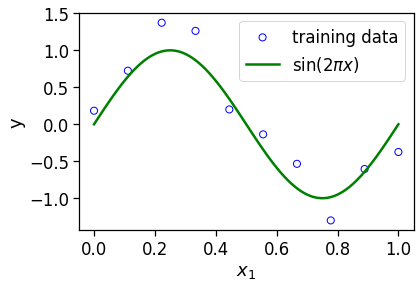

In [55]:
num_samples = 10
X,y = create_non_lin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)

In [56]:
from sklearn.linear_model import LinearRegression as LinReg

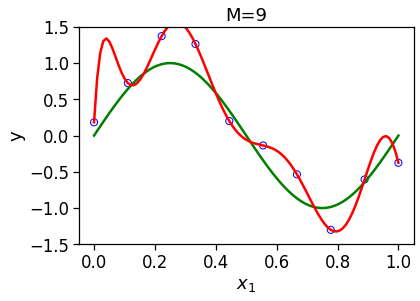

In [57]:
degree = 9
x_transform = polynomial_transform(X,degree)
lin_reg  = LinReg()
lin_reg.fit(x_transform,y)
visualize_model_fit(X,y,lin_reg,degree)

In [58]:
import seaborn as sns

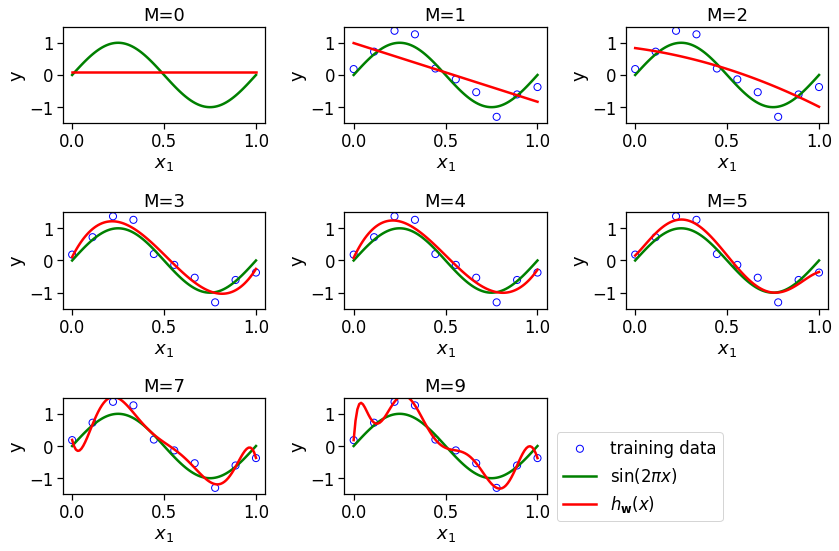

In [60]:
f = plt.figure(figsize =(12,8))
sns.set_context("notebook",font_scale = 1.5 , rc = {'lines.linewidth':2.5})

for i,degree in enumerate([0,1,2,3,4,5,7,9]):
    plt.subplot(3,3,i+1)
    X_transform = polynomial_transform(X,degree)
    lin_reg =LinReg()
    lin_reg.fit(X_transform,y)
    visualize_model_fit(X,y,lin_reg,degree)
f.tight_layout()
plt.legend(bbox_to_anchor =(1.05,0.64),loc=2,borderaxespad = 0.)
plt.show()

In [62]:
import pandas as pd
def  convert_dic_to_df(w_dict,degree):
    poly_w_dict = {i:np.array(np.zeros(degree))for i in range(degree)}
    for deg in poly_w_dict:
        weight_vec =w_dict[deg]
        for i in range(len(weight_vec)):
            poly_w_dict[deg][i] = weight_vec[i]
    poly_w_df = pd.DataFrame(poly_w_dict)
    poly_w_df.columns =['w_'+str(i) for i in range(degree)]
    return poly_w_df
def plot_model_selection(training_errors,val_errors):
    plt.plot(training_errors,'o-',mfc ="none",mec ="b",ms =10,c='b')
    plt.plot(val_errors,'o-',mfc="none,",mec='r',ms =10,c ='r')
    plt.xlabel('degree')
    plt.ylabel('RMSE')
    plt.show()

In [61]:
?plt.plot

In [65]:
training_errors = []
val_errors = []
w_dict = {}
X_val = np.linspace(0,1,100)
y_val = nonlin(X_val)
for i in range(10):
    X_transform = polynomial_transform(X,i)
    X_val_transform = polynomial_transform(X_val,i)
    lin_reg =LinReg()
    lin_reg.fit(X_transform,y)
    w_dict[i] = lin_reg.coef_
    training_errors.append(lin_reg.rmse(X_transform,y))
    val_errors.append(lin_reg.rmse(X_val_transform,y_val+np.random.normal(scale =0.25,size =len(y_val))))
plot_model_selection(training_errors,val_errors)
convert_dic_to_df(w_dict,10)

AttributeError: 'LinearRegression' object has no attribute 'rmse'

In [67]:
from IPython.display import display ,Math,Latex
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [ ]:
# ridge regression 
class LinReg(object):
    def __init__(self):
        self.t0 = 20
        self.t1 = 100
    
    def predict(self,X:np.ndarray) ->np.ndarray:
        y = X @ self.w
        return y
    
    
    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float):
        e = y - self.predict(X)
        return (1/2)*(np.transpose(e)@e)+ (reg_rate/2)*(np.transpose(self.w)@self.w)
    
    def rmse(self,X:np.ndarray,y:np.ndarray) ->float:
         return np.sqrt((2/X.shape[0])* self.loss(X,y,0))
    
    def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float) ->np.ndarray:
        self.w = np.zeros((X.shape[1]))
        eye = np.eye(np.size(X,1))
        self.w = np.linalg.solve(reg_rate*eye+X.T@X,
                                 X.T@y,
        )
        return self.w
    
    def calculate_gradient(self,grad:np.ndarray,lr:float) ->np.ndarray:
        return np.transpose(X)@(self.predict(X)-y)+reg_rate*self.w
    
    def update_weights(self,grad:np.ndarray,lr:float) ->np.ndarray:
        return (self.w - lr*grad)
    
    def learning_sechedule(self,t):
        return self.t0/(t+self.t1)

    def gd()
    